### draw joint distribution plots for the sp3 acid - sp3 amine system. (Fig. 4c)

In [1]:
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd

from rdkit.Chem import rdMolDescriptors, Descriptors
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from matplotlib import cm
plasma = cm.get_cmap('plasma', 32)

import molprops_utils

In [2]:
prop_names = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']

In [3]:
# read data for entire molecule

data1 = pd.read_csv("./ac2drug_am2small/ac2drug_am2small_aromatic_props.csv")
# data1 = pd.read_csv("../../late_stage_div_copy/props_ac3drug_ac3small.csv")
data1["source"] = ["molecule"] * len(data1)

data1_props = data1[prop_names].copy()
amide_row = np.array(data1[data1.rmat_tag==50230227][prop_names])

In [4]:
amide_row

array([[7.77390000e+00, 5.90551000e+02, 1.00000000e+00, 4.00000000e+00,
        6.35700000e+01, 6.00000000e+00, 3.33333333e-01, 6.00000000e+00,
        2.49611355e-01]])

In [5]:
# the change of each property in relation to the amide's
data1_deltas = data1_props-amide_row

In [6]:
# replace properties with difference from amide 
# technically can be new rows, but this takes less memory
data1[prop_names] = data1_deltas

In [7]:
data1.sort_values("rmat_tag",inplace=True)
data1.reset_index(drop=True,inplace=True)

In [8]:
# read data for reaction center only

data2 = pd.read_csv("./ac2drug_am2small/ac2drug_am2small_rxn_centers_props.csv")

data2["source"] = ["RxnCenter"] * len(data2)
data2_props = data2[prop_names].copy()

In [9]:
data2.sort_values("rmat_tag",inplace=True)
data2.reset_index(drop=True,inplace=True)

In [10]:
amide_center_row = np.array(data2[data2.rmat_tag==50230227][prop_names])

data2_deltas = data2_props-amide_center_row
data2[prop_names] = data2_deltas

In [11]:
data1_plot = data1

In [12]:
data2_plot = data2

### setup for joint distribution plotting

### these were hand-adjusted, given each property range.

In [13]:
labels_dict = {
"LogP": ["–5", "–2.5" , "0" , "1.5"],
"MW": [ "–50" ,"–25" ,  "0", "25"],
"HBD": ["–1",  "0",  "1",  "2"  ],
"HBA": ["–1",  "0",  "1",  "2"],
"PSA": [ "–40", "–20",   "0",  "20" , "40" ],
"ROTB": ["–2", "–1", "0",  "1" , "2" , "3"],
"FSP3": ["0", "0.2", "0.4", "0.6", "0.8", "1.0"],
"SSSR": ["–5",   "0",   "5", "10" ],
"QED": ["–0.40" ,"–0.20",  "0" ,  "0.20" , "0.40" ],
}

In [14]:
lims_dict = {

"LogP": [-5,-2.5,0,1.5],
"MW": [ -50,-25,0,25], 
"HBD": [-1,  0,  1,  2  ],
"HBA": [-1,  0,  1,  2],
"PSA": [ -40, -20,   0,  20 , 40],
"ROTB": [-2, -1, -0,  1 , 2 , 3],

"FSP3": [0,0.2,0.4,0.6,0.8,1],
"SSSR": [-5,   0,   5, 10 ],
"QED": [-0.40 ,-0.20,  0 ,  0.20 , 0.40 ],
}


In [15]:
props = np.array(['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'QED'])

In [16]:
prop_bins = {
    "LogP": [30,20],
    "MW"  : 20,
    "HBD" : [-1.5,-0.5,0.5,1.5,2.5],
    "HBA" : [-1.5,-0.5,0.5,1.5,2.5],
    "PSA" : 30,
    "ROTB": [-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5],
    "FSP3": [10,15], 
    "QED" : [15,14]
}

In [17]:
prop_vmax = {
    "LogP": 200,
    "MW"  : None,
    "HBD" : None,
    "HBA" : None,
    "PSA" : None,
    "ROTB": None,
    "FSP3": None, 
    "QED" : 1000
}

In [18]:
prop="QED"

[-4.8841  1.5404]
[-45.041  22.047]
[-1.5, 2.5]
[-1.5, 2.5]
[-29.1   37.38]
[-2.5, 3.5]
[0. 1.]
[-0.32435824  0.35827781]


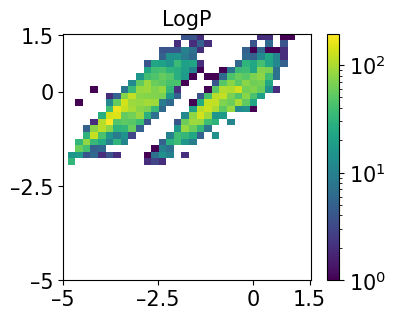

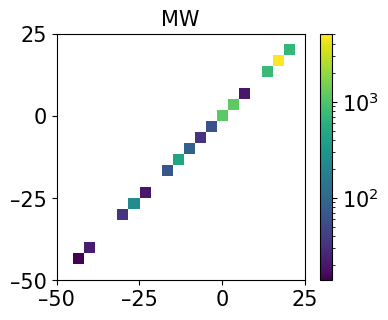

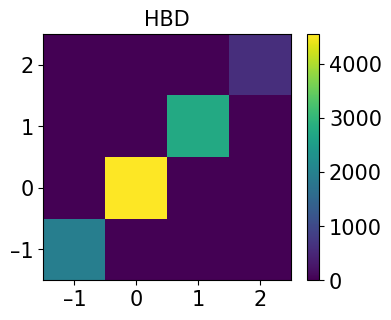

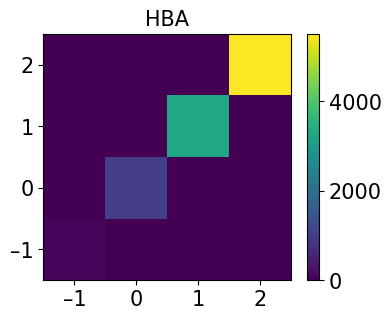

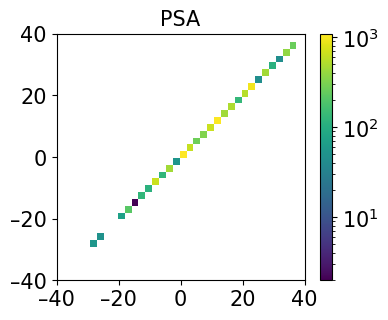

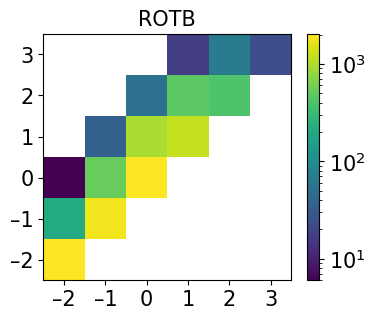

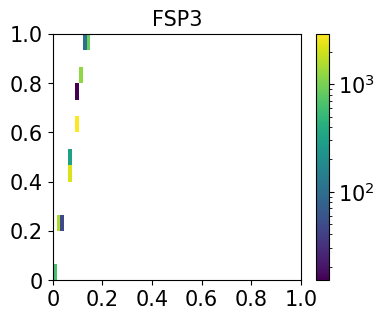

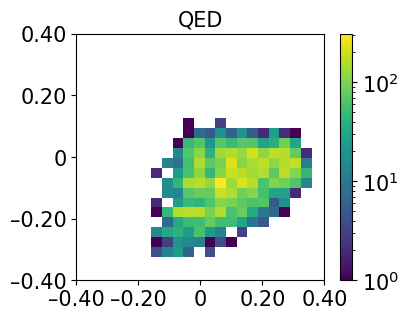

In [19]:
for prop in props:

    lims = np.array([
    np.min( [np.min(data1_plot[prop]),np.min(data2_plot[prop])] ), # min of both axes
    np.max( [np.max(data1_plot[prop]),np.max(data2_plot[prop])] )  # max of both axes
    ])


    x, y = data1_plot[prop],data2_plot[prop]
    k = 0.8
    plt.figure(figsize=(k*5,k*4))

    plot_bins = prop_bins[prop]
    plot_vmax = None


    if prop in ["HBA","HBD"]: 
        plot_norm = "linear"

    else: plot_norm = "log"

    h = plt.hist2d(x,y,norm=plot_norm,bins=plot_bins,vmax=plot_vmax)
    ax = plt.gca()

    if prop in ["HBA","HBD"]: lims = [-1.5,2.5]

    # for ROTB
    if prop == "ROTB": lims = [-2.5,3.5]

    ax.set_xlim(lims)
    ax.set_ylim(lims)
    print(lims)

    ax.set_xticks(lims_dict[prop])
    ax.set_yticks(lims_dict[prop])

    ax.set_xticklabels(labels_dict[prop],fontsize=15)
    ax.set_yticklabels(labels_dict[prop],fontsize=15)

    cbar = plt.colorbar(h[3],shrink=1)
    cbar.ax.tick_params(labelsize=15)
    plt.title(prop,fontsize=15)
    pass
    plt.savefig(f"./figures/latestage_sp2_{prop}.png",dpi=600)
    plt.savefig(f"./figures/latestage_sp2_{prop}.svg",format="svg")